# Churn Case Study

In [3]:
import numpy as np
import pandas as pd

In [4]:
# read ride data
ride_test = pd.read_csv('data/churn_test.csv')
ride_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,2.48,5.0,5.0,1.0,Winterfell,2014-01-07,Android,2014-01-06,0.0,2,True,100.0
1,10.81,5.0,5.0,1.0,Winterfell,2014-04-29,iPhone,2014-01-06,0.0,3,True,100.0
2,12.95,5.0,5.0,1.0,Astapor,2014-01-29,Android,2014-01-19,0.0,1,True,100.0
3,3.92,5.0,NaN,1.0,Winterfell,2014-02-16,iPhone,2014-01-09,0.0,0,False,0.0
4,1.46,5.0,4.5,1.0,Astapor,2014-01-09,iPhone,2014-01-07,0.0,2,False,100.0


## Prepping Test Data

In [5]:
ride_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
avg_dist                  10000 non-null float64
avg_rating_by_driver      9961 non-null float64
avg_rating_of_driver      8406 non-null float64
avg_surge                 10000 non-null float64
city                      10000 non-null object
last_trip_date            10000 non-null object
phone                     9923 non-null object
signup_date               10000 non-null object
surge_pct                 10000 non-null float64
trips_in_first_30_days    10000 non-null int64
luxury_car_user           10000 non-null bool
weekday_pct               10000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 869.2+ KB


In [6]:
# convert dates from strings to dates
ride_test['last_trip_date'] = pd.to_datetime(ride_test['last_trip_date'])
ride_test['signup_date'] = pd.to_datetime(ride_test['signup_date'])

In [7]:
# convert the cities to a dummy
# city_dummy = ride_test.get_dummies(ride_test['city']) # get dummies
# ride_test[['Winterfell', 'Astapor', "King's Landing"]] = city_dummy[['Winterfell', 'Astapor', "King's Landing"]] 
# keep three since we are 

#Dummify & create a new df (riders) of dummified cities
ride_test = pd.concat([ride_test,pd.get_dummies(ride_test['city'])], axis = 1)
ride_test = ride_test.drop(['city'],axis = 1)
ride_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell
0,2.48,5.0,5.0,1.0,2014-01-07,Android,2014-01-06,0.0,2,True,100.0,0,0,1
1,10.81,5.0,5.0,1.0,2014-04-29,iPhone,2014-01-06,0.0,3,True,100.0,0,0,1
2,12.95,5.0,5.0,1.0,2014-01-29,Android,2014-01-19,0.0,1,True,100.0,1,0,0
3,3.92,5.0,NaN,1.0,2014-02-16,iPhone,2014-01-09,0.0,0,False,0.0,0,0,1
4,1.46,5.0,4.5,1.0,2014-01-09,iPhone,2014-01-07,0.0,2,False,100.0,1,0,0


In [8]:
# finding if a rider is active (Took a trip in the last 30 days, from Max date (July 1, 2014))
# creating Y target variable
ride_test['not_active'] = ride_test['last_trip_date'] < (ride_test.last_trip_date.max() - np.timedelta64(30, 'D'))
ride_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,not_active
0,2.48,5.0,5.0,1.0,2014-01-07,Android,2014-01-06,0.0,2,True,100.0,0,0,1,True
1,10.81,5.0,5.0,1.0,2014-04-29,iPhone,2014-01-06,0.0,3,True,100.0,0,0,1,True
2,12.95,5.0,5.0,1.0,2014-01-29,Android,2014-01-19,0.0,1,True,100.0,1,0,0,True
3,3.92,5.0,NaN,1.0,2014-02-16,iPhone,2014-01-09,0.0,0,False,0.0,0,0,1,True
4,1.46,5.0,4.5,1.0,2014-01-09,iPhone,2014-01-07,0.0,2,False,100.0,1,0,0,True


## Prepping Train Data

In [9]:
# read ride data (I am cleaning test, Kunal is cleaning train data set)
ride_train = pd.read_csv('data/churn_train.csv')
ride_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [10]:
# convert dates from strings to dates
ride_train['last_trip_date'] = pd.to_datetime(ride_train['last_trip_date'])
ride_train['signup_date'] = pd.to_datetime(ride_train['signup_date'])

In [11]:
# Dummify & create a new df (riders) of dummified cities
ride_train = pd.concat([ride_train,pd.get_dummies(ride_train['city'])], axis = 1)
ride_train = ride_train.drop(['city'],axis = 1)
ride_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell
0,6.94,5.0,5.0,1.00,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1,0,0
1,8.06,5.0,5.0,1.00,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1,0,0
2,21.50,4.0,NaN,1.00,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,0,0,1
3,9.46,5.0,NaN,2.75,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,0,0,1
4,13.77,5.0,NaN,1.00,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0,0,1


In [12]:
# finding if a rider is active (Took a trip in the last 30 days, from Max date (July 1, 2014))
# creating Y target variable
ride_train['not_active'] = ride_train['last_trip_date'] < (ride_train.last_trip_date.max() - np.timedelta64(30, 'D'))
ride_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,not_active
0,6.94,5.0,5.0,1.00,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1,0,0,True
1,8.06,5.0,5.0,1.00,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1,0,0,True
2,21.50,4.0,NaN,1.00,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,0,0,1,True
3,9.46,5.0,NaN,2.75,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,0,0,1,True
4,13.77,5.0,NaN,1.00,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0,0,1,True


### Dealing with Null values for Trees

In [13]:
# to look at columns with null values
for i in ride_train.columns:
    if ride_train[i].isnull().sum() != 0:
        print(i, ride_train[i].isnull().sum())
        
# to look at columns with null values
for i in ride_test.columns:
    if ride_test[i].isnull().sum() != 0:
        print(i, ride_test[i].isnull().sum())

avg_rating_by_driver 162
avg_rating_of_driver 6528
phone 319
avg_rating_by_driver 39
avg_rating_of_driver 1594
phone 77


In [14]:
# convert phone into dummy variables with iPhone, Android, other as default

# Dummify & create a new df of dummified phones
ride_train = pd.concat([ride_train,pd.get_dummies(ride_train['phone'])], axis = 1)
ride_train = ride_train.drop(['phone'],axis = 1)
ride_train.head()

# Dummify & create a new df of dummified phones
ride_test = pd.concat([ride_test,pd.get_dummies(ride_test['phone'])], axis = 1)
ride_test = ride_test.drop(['phone'],axis = 1)
ride_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,not_active,Android,iPhone
0,2.48,5.0,5.0,1.0,2014-01-07,2014-01-06,0.0,2,True,100.0,0,0,1,True,1,0
1,10.81,5.0,5.0,1.0,2014-04-29,2014-01-06,0.0,3,True,100.0,0,0,1,True,0,1
2,12.95,5.0,5.0,1.0,2014-01-29,2014-01-19,0.0,1,True,100.0,1,0,0,True,1,0
3,3.92,5.0,NaN,1.0,2014-02-16,2014-01-09,0.0,0,False,0.0,0,0,1,True,0,1
4,1.46,5.0,4.5,1.0,2014-01-09,2014-01-07,0.0,2,False,100.0,1,0,0,True,0,1


In [15]:
# to look at columns with null values
for i in ride_train.columns:
    if ride_train[i].isnull().sum() != 0:
        print(i, ride_train[i].isnull().sum())
        
# to look at columns with null values
for i in ride_test.columns:
    if ride_test[i].isnull().sum() != 0:
        print(i, ride_test[i].isnull().sum())

avg_rating_by_driver 162
avg_rating_of_driver 6528
avg_rating_by_driver 39
avg_rating_of_driver 1594


In [16]:
# before converting avg_ratings, create a rating - yes/no column
ride_train['rating'] = ride_train.avg_rating_of_driver.copy()
ride_train.rating = ride_train.rating.where(ride_train.rating < 0, 1, inplace=True)
ride_train.rating = ride_train.rating.replace(np.nan, 0)

ride_test['rating'] = ride_test.avg_rating_of_driver.copy()
ride_test.rating = ride_test.rating.where(ride_test.rating < 0, 1, inplace=True)
ride_test.rating = ride_test.rating.replace(np.nan, 0)
ride_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,not_active,Android,iPhone,rating
0,2.48,5.0,5.0,1.0,2014-01-07,2014-01-06,0.0,2,True,100.0,0,0,1,True,1,0,0
1,10.81,5.0,5.0,1.0,2014-04-29,2014-01-06,0.0,3,True,100.0,0,0,1,True,0,1,0
2,12.95,5.0,5.0,1.0,2014-01-29,2014-01-19,0.0,1,True,100.0,1,0,0,True,1,0,0
3,3.92,5.0,NaN,1.0,2014-02-16,2014-01-09,0.0,0,False,0.0,0,0,1,True,0,1,0
4,1.46,5.0,4.5,1.0,2014-01-09,2014-01-07,0.0,2,False,100.0,1,0,0,True,0,1,0


In [17]:
# convert avg_ratings into modes
ride_train = ride_train.where(pd.notna(ride_train), ride_train.mode(), axis='columns')
ride_test = ride_test.where(pd.notna(ride_test), ride_test.mode(), axis='columns')

In [18]:
# to look at columns with null values
for i in ride_train.columns:
    if ride_train[i].isnull().sum() != 0:
        print(i, ride_train[i].isnull().sum())
        
# to look at columns with null values
for i in ride_test.columns:
    if ride_test[i].isnull().sum() != 0:
        print(i, ride_test[i].isnull().sum())

In [19]:
# to check if my dates are datetime type
ride_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
last_trip_date            40000 non-null datetime64[ns]
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
Astapor                   40000 non-null uint8
King's Landing            40000 non-null uint8
Winterfell                40000 non-null uint8
not_active                40000 non-null bool
Android                   40000 non-null uint8
iPhone                    40000 non-null uint8
rating                    40000 non-null int64
dtypes: bool(2), datetime64[ns](2), float64(6), int64(2), uint8(

In [20]:
# before dropping last_trip_date and signup_date
# create signup_elapsed

ride_train['signup_elapsed'] = pd.to_datetime('2014-07-01') - ride_train['signup_date']
ride_train['signup_elapsed'] = ride_train['signup_elapsed'].dt.days

ride_test['signup_elapsed'] = pd.to_datetime('2014-07-01') - ride_test['signup_date']
ride_test['signup_elapsed'] = ride_test['signup_elapsed'].dt.days

ride_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,King's Landing,Winterfell,not_active,Android,iPhone,rating,signup_elapsed
0,6.94,5.0,5.0,1.00,2014-05-03,2014-01-12,0.0,0,False,100.0,1,0,0,True,1,0,0,170
1,8.06,5.0,5.0,1.00,2014-01-26,2014-01-25,0.0,2,True,0.0,1,0,0,True,1,0,0,157
2,21.50,4.0,5.0,1.00,2014-05-21,2014-01-02,0.0,1,True,100.0,0,0,1,True,0,1,0,180
3,9.46,5.0,5.0,2.75,2014-01-10,2014-01-09,100.0,1,False,100.0,0,0,1,True,1,0,0,173
4,13.77,5.0,5.0,1.00,2014-05-13,2014-01-31,0.0,0,False,100.0,0,0,1,True,0,1,0,151


In [21]:
# looking at class imbalance for target variable
print(ride_test.query('not_active == True').count())
print(ride_test.query('not_active == False').count())
print(ride_train.query('not_active == True').count())
print(ride_train.query('not_active == False').count())
(24968+6228)*100/(24968+6228+3772+15302)

avg_dist                  6228
avg_rating_by_driver      6228
avg_rating_of_driver      6228
avg_surge                 6228
last_trip_date            6228
signup_date               6228
surge_pct                 6228
trips_in_first_30_days    6228
luxury_car_user           6228
weekday_pct               6228
Astapor                   6228
King's Landing            6228
Winterfell                6228
not_active                6228
Android                   6228
iPhone                    6228
rating                    6228
signup_elapsed            6228
dtype: int64
avg_dist                  3772
avg_rating_by_driver      3772
avg_rating_of_driver      3772
avg_surge                 3772
last_trip_date            3772
signup_date               3772
surge_pct                 3772
trips_in_first_30_days    3772
luxury_car_user           3772
weekday_pct               3772
Astapor                   3772
King's Landing            3772
Winterfell                3772
not_active                

62.056892778993436

In [22]:
# set up x_train, etc.
columns = ride_train.columns.tolist()
columns = [c for c in columns if c not in ['last_trip_date', 'signup_date', 'not_active']]
x_train = ride_train[columns]
y_train = ride_train.not_active
x_test = ride_test[columns]
y_test = ride_test.not_active
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(40000, 15) (40000,)
(10000, 15) (10000,)


## Tuning Parameters: Stochastic Gradient Boosting

In [28]:
# imports
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
# Stochastic Gradient Boosting Classification with ideal params
seed = 1
num_trees = 200

model = GradientBoostingClassifier(learning_rate=0.05, 
                                   max_depth=10, 
                                   max_features=2, 
                                   min_samples_split=800, 
                                   n_estimators=num_trees, 
                                   random_state=seed, 
                                   subsample=0.8)
model.fit(x_train, y_train)

# make predictions
expected = y_test
predicted = model.predict(x_test)

# summarize the fit of the model
print("Gradient Booster | Accuracy: ", metrics.accuracy_score(expected, predicted))
print(metrics.classification_report(expected, predicted))
print(model)

NameError: name 'metrics' is not defined

## Feature Importance Plots

In [23]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')  # annoying warnings

NameError: name 'gbc_param_selection' is not defined

In [34]:
import requests
import itertools
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
import matplotlib.pyplot as plt

In [32]:
feature_importances = model.feature_importances_
top10_colindex = np.argsort(feature_importances)[::-1][0:10]
feature_importances = feature_importances[top10_colindex]
feature_importances = feature_importances / float(feature_importances.max()) #normalize

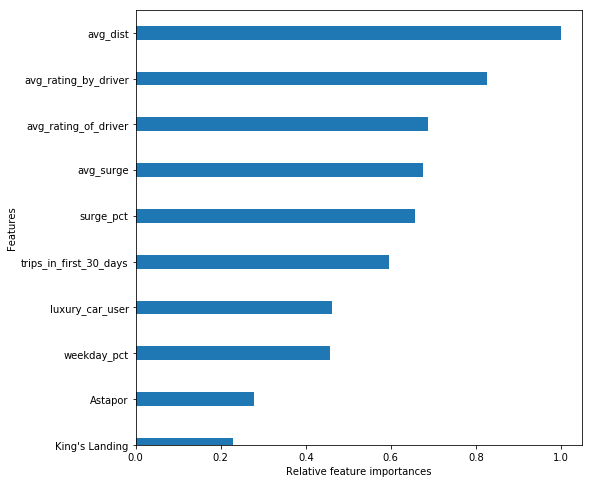

In [36]:
y_ind = np.arange(9, -1, -1) # 9 to 0
fig = plt.figure(figsize=(8, 8))
plt.barh(y_ind, feature_importances, height = 0.3, align='center')
plt.ylim(y_ind.min() + 0.5, y_ind.max() + 0.5)
plt.yticks(y_ind, columns)
plt.xlabel('Relative feature importances')
plt.ylabel('Features');

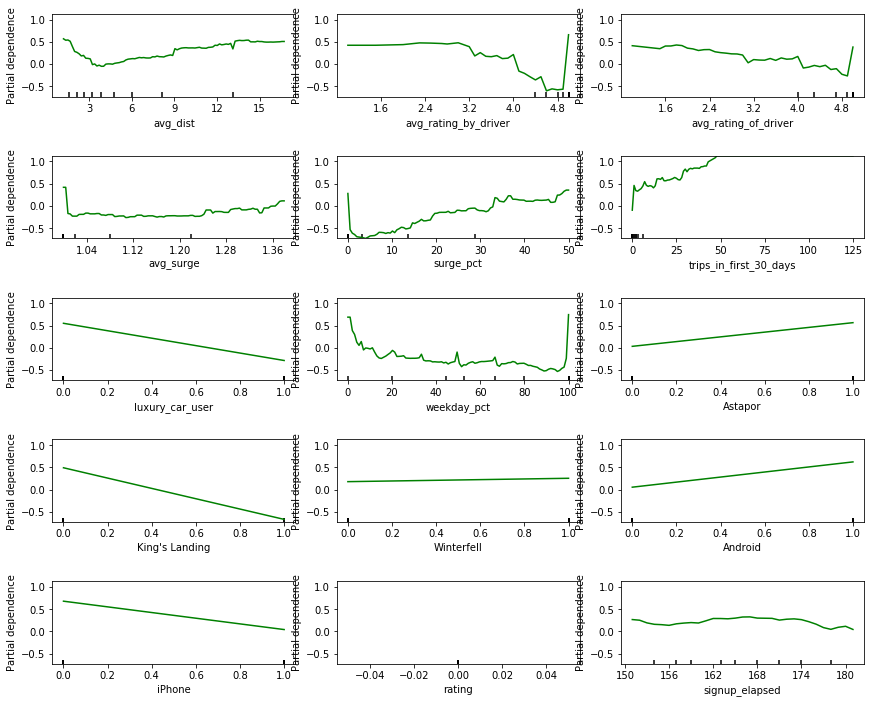

In [39]:
plot_partial_dependence(model, x_train, columns, feature_names = columns,
                        figsize=(12,10))
plt.tight_layout();

Partial dependency plots show the effect of a given feature on
the target variable after accounting for the average effect of all
the other features.  The regions where the graph is flat means
that there isn't much of a relationship between the target (in
this case, whether it's churned customer or not) and the feature investigated
by that plot in that region.  However, in areas where it isn't flat
the target is more dependent on the feature in question.